### Область работы 1 (библиотеки)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV, KFold, StratifiedShuffleSplit, ParameterGrid,RandomizedSearchCV,cross_validate
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, TransformedTargetRegressor
from sklearn.metrics import fbeta_score, make_scorer

from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder, TargetEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures, QuantileTransformer, PowerTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.linear_model import HuberRegressor

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

import category_encoders as ce

### Область работы 2 (поиск  модели .... )

In [4]:
path_train = 'diamonds.csv' 

In [5]:
df = pd.read_csv(path_train)
df.tail(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
40452,0.42,Ideal,G,SI2,60.9,56.0,971,4.87,4.89,2.97
40453,2.05,Premium,E,SI2,59.7,59.0,17237,8.39,8.27,4.97
40454,0.55,Premium,H,VVS1,61.1,57.0,1980,5.35,5.26,3.24


In [6]:
duplicates = df[df.duplicated()]
print(df.duplicated().sum())

78


In [7]:
df = df.drop_duplicates()

In [8]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 40377 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40377 non-null  float64
 1   cut      40377 non-null  object 
 2   color    40377 non-null  object 
 3   clarity  40377 non-null  object 
 4   depth    40377 non-null  float64
 5   table    40377 non-null  float64
 6   price    40377 non-null  int64  
 7   x        40377 non-null  float64
 8   y        40377 non-null  float64
 9   z        40377 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.4+ MB


None

,carat,depth,table,price,x,y,z
count,40377.00000,40377.000000,40377.000000,40377.000000,40377.000000,40377.000000,40377.000000
mean,0.79713,61.745600,57.452126,3938.759690,5.728777,5.732886,3.537583
std,0.47404,1.420043,2.231121,3998.041468,1.122689,1.152500,0.709028
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,946.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.000000,6.540000,6.530000,4.030000
max,5.01000,78.200000,95.000000,18818.000000,10.740000,58.900000,31.800000


In [9]:
# df['x'].value_counts().sort_index(ascending=False).head(5)

In [10]:
# df[df['z'].isin(df['z'].value_counts().sort_index(ascending=False).head(5).index)]

In [11]:
# df['y'].hist(bins=500)

In [12]:
df['x']=np.where(df['x']>=15, df['x']/10,df['x'])
df['y']=np.where(df['y']>=15, df['y']/10,df['y'])
df['z']=np.where(df['z']>=15, df['z']/10,df['z'])

In [13]:
# df.columns

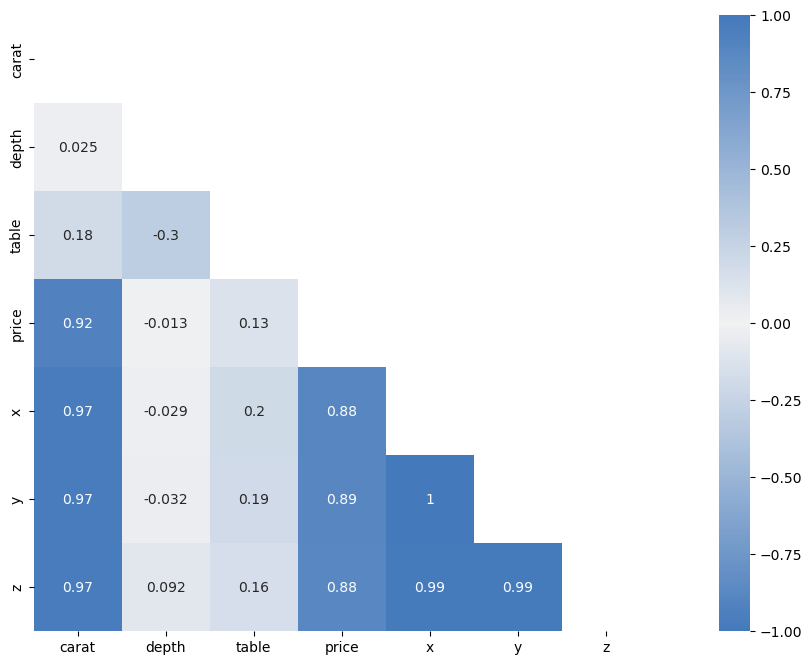

In [14]:
corr = df[['carat', 'depth', 'table', 'price', 'x', 'y','z']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(18, 8))
sns.heatmap(corr,
    mask=mask,
    cmap=sns.diverging_palette(250, 250, as_cmap=True),
    annot = True,
    vmin=-1.0, vmax=1.0,
    square=True,
    ax=ax);

In [15]:
df[df.eq(0).any(axis=1)]

,carat,cut,color,clarity,depth,table,price,x,y,z
4817,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
7928,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10418,2.02,Premium,H,VS2,62.7,53.0,18207,8.02,7.95,0.0
11203,2.25,Premium,I,SI1,61.3,58.0,15397,8.52,8.42,0.0
13661,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
15977,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.0
18359,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
23017,1.20,Premium,D,VVS1,62.1,59.0,15686,0.00,0.00,0.0
25662,1.56,Ideal,G,VS2,62.2,54.0,12800,0.00,0.00,0.0
32084,2.25,Premium,H,SI2,62.8,59.0,18034,0.00,0.00,0.0


In [16]:
df = df.drop(['depth'], axis=1)

In [17]:
cat_features = ['cut','color']
axis_features = ['x','y','z']
num_features = ['carat',  'table']

y = np.array(df.price)
X = df.drop(columns=['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [18]:
axis_transformer = Pipeline(steps=[
    ('missing_num', IterativeImputer(missing_values=0, max_iter=5)),
    ('polynom', PolynomialFeatures(2,include_bias=False)),
    ('scaler', StandardScaler())])

num = Pipeline(steps=[
    ('missing_num', IterativeImputer(missing_values=0, max_iter=5)),
    ('scaler', StandardScaler())])

clarity_map = [{
    'col':'clarity',
    'mapping':{'IF':7, 'VVS1':6, 'VVS2':5, 'VS1':4, 'VS2':3, 
               'SI1':2, 'SI2':1, 'I1':0}
    }]

clarity_transformer = Pipeline(steps=[
    ('missing_num', SimpleImputer(strategy = 'most_frequent')),
    ('ce',ce.OrdinalEncoder(mapping=clarity_map)),
    ('scaler', MinMaxScaler())
    ])    
    
CT = ColumnTransformer([
        ("axis_transformer", axis_transformer, axis_features),
        ("num", num, num_features),
        # убрать быстую разряженную 
        ("cat", OneHotEncoder(sparse_output=False, drop='first'), cat_features),
        ("ordinal_map", clarity_transformer, ['clarity'])
      ], remainder='passthrough').set_output(transform='pandas')

display(CT)

ct = CT.fit_transform(X_train)
pd.DataFrame(ct).head().T

ColumnTransformer(remainder='passthrough',
                  transformers=[('axis_transformer',
                                 Pipeline(steps=[('missing_num',
                                                  IterativeImputer(max_iter=5,
                                                                   missing_values=0)),
                                                 ('polynom',
                                                  PolynomialFeatures(include_bias=False)),
                                                 ('scaler', StandardScaler())]),
                                 ['x', 'y', 'z']),
                                ('num',
                                 Pipeline(steps=[('missing_num',
                                                  IterativeImputer(max_iter=5,
                                                                   missing_values=0)),
                                                 ('scaler', Stand...),
                                 ['carat', 'table']),
                                ('cat',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['cut', 'color']),
                                ('ordinal_map',
                                 Pipeline(steps=[('missing_num',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ce',
                                                  OrdinalEncoder(mapping=[{'col': 'clarity',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': IF      7
VVS1    6
VVS2    5
VS1     4
VS2     3
SI1     2
SI2     1
I1      0
dtype: int64}])),
                                                 ('scaler', MinMaxScaler())]),
                                 ['clarity'])])

,32245,17856,13836,6125,25434
axis_transformer__x,1.555693,0.646453,-0.770892,-0.895690,0.735594
axis_transformer__y,1.529327,0.712225,-0.823208,-0.859125,0.676309
axis_transformer__z,1.123924,0.748590,-0.839357,-0.810485,0.560924
axis_transformer__x^2,1.623015,0.564617,-0.776335,-0.876378,0.661533
axis_transformer__x y,1.607646,0.600828,-0.797956,-0.862548,0.630029
axis_transformer__x z,1.358420,0.622491,-0.805884,-0.844555,0.568463
axis_transformer__y^2,1.590750,0.636956,-0.819202,-0.848013,0.597882
axis_transformer__y z,1.342869,0.659418,-0.827275,-0.830043,0.537261
axis_transformer__z^2,1.101371,0.675956,-0.831783,-0.808587,0.473147
num__carat,1.474084,0.485391,-0.797806,-0.839878,0.464355


In [19]:
def plot_2_error(y_true, y_predicted):
    residuals = (y_true - y_predicted)/y_predicted
    max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
    max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
    max_true, max_pred = y_true[max_idx], y_predicted[max_idx]
    mape = mean_squared_error(y_true, y_predicted)
    print("Max Error:", "{:,.0f}".format(max_error))
    print(' ')
    print('----------------------')
    print("   MSE Error:", "{:,.2f}".format(mape*100))
    print('----------------------')

    ## Plot predicted vs true
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    from statsmodels.graphics.api import abline_plot
    ax[0].scatter(y_predicted, y_true, color="black", alpha=0.25)
    abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
    ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
    ax[0].grid(True)
    ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
    ax[0].legend()

    ## Plot predicted vs residuals
    ax[1].scatter(y_predicted, residuals, color="red", alpha=0.25)
    ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
    ax[1].grid(True)
    ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
    ax[1].hlines(y=0, xmin=np.min(y_predicted), xmax=np.max(y_predicted))
    ax[1].legend()
    plt.show()

In [20]:
def mse_irq(y_true, y_pred):
    delta = y_pred - y_true
    q_25 = np.quantile(delta, 0.25)
    q_75 = np.quantile(delta, 0.75)
    irq = q_75 - q_25
    mask = (delta < q_25 - 1.5*irq) | (delta > q_75 + 1.5*irq)
    if delta[mask].sum() == 0:
        results = 0
    else:
        results = -np.sum((delta[mask])**2)/len(delta[mask])
    return results


**Huber Regression**

In [22]:
model_pipe_hub = Pipeline([
                ('model', TransformedTargetRegressor(
                        regressor = Pipeline(steps=[
                                ('preproc', CT),
                                ('estimator', HuberRegressor())
                            ]),
                        transformer=PowerTransformer(),
                        check_inverse = False)
                )])
model_pipe_hub.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Pipeline(steps=[('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=Pipeline(steps=[('preproc',
                                                                       ColumnTransformer(remainder='passthrough',
                                                                                         transformers=[('axis_transformer',
                                                                                                        Pipeline(steps=[('missing_num',
                                                                                                                         IterativeImputer(max_iter=5,
                                                                                                                                          missing_values=0)),
                                                                                                                        ('polynom',
                                                                                                                         PolynomialFeatures(include_bias=False)),
                                                                                                                        ('scaler',
                                                                                                                         StandardScaler())]),
                                                                                                        ['x',
                                                                                                         '...
                                                                                                                      sparse_output=False),
                                                                                                        ['cut',
                                                                                                         'color']),
                                                                                                       ('ordinal_map',
                                                                                                        Pipeline(steps=[('missing_num',
                                                                                                                         SimpleImputer(strategy='most_frequent')),
                                                                                                                        ('ce',
                                                                                                                         OrdinalEncoder(mapping=[{'col': 'clarity',
                                                                                                                                                  'data_type': dtype('O'),
                                                                                                                                                  'mapping': IF      7
VVS1    6
VVS2    5
VS1     4
VS2     3
SI1     2
SI2     1
I1      0
dtype: int64}])),
                                                                                                                        ('scaler',
                                                                                                                         MinMaxScaler())]),
                                                                                                        ['clarity'])])),
                                                                      ('estimator',
                                                                       HuberRegressor())]),
                                            transformer=PowerTransformer()))])

In [23]:
print(model_pipe_hub.score(X_train, y_train))
print(model_pipe_hub.score(X_test, y_test))

0.9483731601785784
0.950758139376461


Max Error: 5
 
----------------------
   MSE Error: 77,801,756.28
----------------------


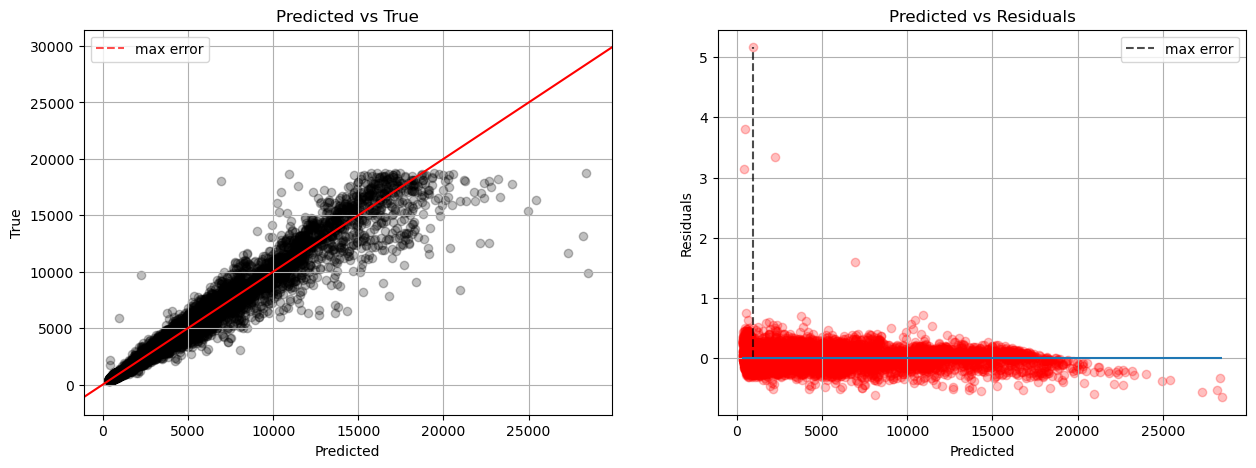

In [24]:
plot_2_error(y_test, model_pipe_hub.predict(X_test))

In [25]:
print(mse_irq(y_test, model_pipe_hub.predict(X_test)))
print(mean_squared_error(y_test, model_pipe_hub.predict(X_test)))

-4332491.790750911
778017.5628119865


**KNN**

In [27]:
model_pipel = Pipeline([
                ('model', TransformedTargetRegressor(
                        regressor = Pipeline(steps=[
                                ('preproc', CT),
                                ('estimator', KNeighborsRegressor())
                            ]),
                        transformer=QuantileTransformer(n_quantiles=1000, output_distribution="uniform"),
                        check_inverse = False)
                )])
model_pipel.fit(X_train, y_train)

Pipeline(steps=[('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=Pipeline(steps=[('preproc',
                                                                       ColumnTransformer(remainder='passthrough',
                                                                                         transformers=[('axis_transformer',
                                                                                                        Pipeline(steps=[('missing_num',
                                                                                                                         IterativeImputer(max_iter=5,
                                                                                                                                          missing_values=0)),
                                                                                                                        ('polynom',
                                                                                                                         PolynomialFeatures(include_bias=False)),
                                                                                                                        ('scaler',
                                                                                                                         StandardScaler())]),
                                                                                                        ['x',
                                                                                                         '...
                                                                                                        ['cut',
                                                                                                         'color']),
                                                                                                       ('ordinal_map',
                                                                                                        Pipeline(steps=[('missing_num',
                                                                                                                         SimpleImputer(strategy='most_frequent')),
                                                                                                                        ('ce',
                                                                                                                         OrdinalEncoder(mapping=[{'col': 'clarity',
                                                                                                                                                  'data_type': dtype('O'),
                                                                                                                                                  'mapping': IF      7
VVS1    6
VVS2    5
VS1     4
VS2     3
SI1     2
SI2     1
I1      0
dtype: int64}])),
                                                                                                                        ('scaler',
                                                                                                                         MinMaxScaler())]),
                                                                                                        ['clarity'])])),
                                                                      ('estimator',
                                                                       KNeighborsRegressor())]),
                                            transformer=QuantileTransformer()))])

In [28]:
param_grid = [
    {'model__regressor__preproc__num__scaler': [StandardScaler(), RobustScaler()],
     'model__regressor__preproc__ordinal_map__ce':[ce.OrdinalEncoder(mapping=clarity_map), TargetEncoder()],
     'model__regressor__estimator':[KNeighborsRegressor()],
     'model__regressor__estimator__n_neighbors': [3,4,5],
     'model__regressor__estimator__p':[1,2],
     'model__transformer':[PowerTransformer(),QuantileTransformer(n_quantiles=1000, output_distribution="uniform")]},
]
    
scores='neg_mean_absolute_percentage_error'
grid_1 = GridSearchCV(model_pipel, n_jobs=-1, param_grid=param_grid, scoring=scores)
grid_1.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('model',
                                        TransformedTargetRegressor(check_inverse=False,
                                                                   regressor=Pipeline(steps=[('preproc',
                                                                                              ColumnTransformer(remainder='passthrough',
                                                                                                                transformers=[('axis_transformer',
                                                                                                                               Pipeline(steps=[('missing_num',
                                                                                                                                                IterativeImputer(max_iter=5,
                                                                                                                                                                 missing_values=0)),
                                                                                                                                               ('polynom',
                                                                                                                                                PolynomialFeatures(include_bias=False)),
                                                                                                                                               ('scaler',
                                                                                                                                                Sta...
                          'model__regressor__preproc__num__scaler': [StandardScaler(),
                                                                     RobustScaler()],
                          'model__regressor__preproc__ordinal_map__ce': [OrdinalEncoder(mapping=[{'col': 'clarity',
                                                                                                  'data_type': dtype('O'),
                                                                                                  'mapping': IF      7
VVS1    6
VVS2    5
VS1     4
VS2     3
SI1     2
SI2     1
I1      0
dtype: int64}]),
                                                                         TargetEncoder()],
                          'model__transformer': [PowerTransformer(),
                                                 QuantileTransformer()]}],
             scoring='neg_mean_absolute_percentage_error')

In [29]:
grid_result = pd.DataFrame(grid_1.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,28,12,44,29,13,45,30,14,8,24,...,39,17,1,33,18,19,34,2,3,35
mean_fit_time,0.089572,0.096155,0.093681,0.072909,0.090838,0.076343,0.08824,0.09298,0.087614,0.077136,...,0.073153,0.074468,0.089306,0.075761,0.084056,0.069466,0.085375,0.089811,0.073384,0.071929
std_fit_time,0.015625,0.008063,0.007189,0.007853,0.011049,0.003466,0.010363,0.012666,0.008233,0.005268,...,0.007131,0.007429,0.005475,0.007771,0.009484,0.003794,0.012056,0.008184,0.010533,0.010181
mean_score_time,0.524206,0.531383,0.516822,0.488817,0.563761,0.510515,0.50983,0.539136,0.508869,0.507334,...,1.921015,1.805435,1.868642,1.823344,1.806552,1.853497,1.831416,1.845869,1.822959,1.804448
std_score_time,0.017617,0.02643,0.010239,0.018804,0.009873,0.009596,0.017536,0.026361,0.014442,0.017854,...,0.062237,0.046444,0.047413,0.044093,0.048339,0.063917,0.021934,0.056382,0.049268,0.028852
param_model__regressor__estimator,KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),...,KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor()
param_model__regressor__estimator__n_neighbors,4,3,5,4,3,5,4,3,3,4,...,5,4,3,5,4,4,5,3,3,5
param_model__regressor__estimator__p,2,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1
param_model__regressor__preproc__num__scaler,RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),StandardScaler(),StandardScaler(),...,RobustScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler()
param_model__regressor__preproc__ordinal_map__ce,"OrdinalEncoder(mapping=[{'col': 'clarity', 'da...","OrdinalEncoder(mapping=[{'col': 'clarity', 'da...","OrdinalEncoder(mapping=[{'col': 'clarity', 'da...","OrdinalEncoder(mapping=[{'col': 'clarity', 'da...","OrdinalEncoder(mapping=[{'col': 'clarity', 'da...","OrdinalEncoder(mapping=[{'col': 'clarity', 'da...",TargetEncoder(),TargetEncoder(),"OrdinalEncoder(mapping=[{'col': 'clarity', 'da...","OrdinalEncoder(mapping=[{'col': 'clarity', 'da...",...,TargetEncoder(),"OrdinalEncoder(mapping=[{'col': 'clarity', 'da...","OrdinalEncoder(mapping=[{'col': 'clarity', 'da...","OrdinalEncoder(mapping=[{'col': 'clarity', 'da...",TargetEncoder(),TargetEncoder(),TargetEncoder(),TargetEncoder(),TargetEncoder(),TargetEncoder()
param_model__transformer,PowerTransformer(),PowerTransformer(),PowerTransformer(),QuantileTransformer(),QuantileTransformer(),QuantileTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),...,QuantileTransformer(),QuantileTransformer(),QuantileTransformer(),QuantileTransformer(),PowerTransformer(),QuantileTransformer(),PowerTransformer(),PowerTransformer(),QuantileTransformer(),QuantileTransformer()


In [30]:
best_knn = grid_1.best_estimator_
best_knn.fit(X_train, y_train)

Pipeline(steps=[('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=Pipeline(steps=[('preproc',
                                                                       ColumnTransformer(remainder='passthrough',
                                                                                         transformers=[('axis_transformer',
                                                                                                        Pipeline(steps=[('missing_num',
                                                                                                                         IterativeImputer(max_iter=5,
                                                                                                                                          missing_values=0)),
                                                                                                                        ('polynom',
                                                                                                                         PolynomialFeatures(include_bias=False)),
                                                                                                                        ('scaler',
                                                                                                                         StandardScaler())]),
                                                                                                        ['x',
                                                                                                         '...
                                                                                                         'color']),
                                                                                                       ('ordinal_map',
                                                                                                        Pipeline(steps=[('missing_num',
                                                                                                                         SimpleImputer(strategy='most_frequent')),
                                                                                                                        ('ce',
                                                                                                                         OrdinalEncoder(mapping=[{'col': 'clarity',
                                                                                                                                                  'data_type': dtype('O'),
                                                                                                                                                  'mapping': IF      7
VVS1    6
VVS2    5
VS1     4
VS2     3
SI1     2
SI2     1
I1      0
dtype: int64}])),
                                                                                                                        ('scaler',
                                                                                                                         MinMaxScaler())]),
                                                                                                        ['clarity'])])),
                                                                      ('estimator',
                                                                       KNeighborsRegressor(n_neighbors=4))]),
                                            transformer=PowerTransformer()))])

In [31]:
print(mse_irq(y_test, best_knn.predict(X_test)))
print(mean_squared_error(y_test, best_knn.predict(X_test)))

-3886894.8313437644
799247.3709264068


In [32]:
print(model_pipel.score(X_train, y_train))
print(model_pipel.score(X_test, y_test))

0.9650343931828105
0.9433402862049141


Max Error: 3
 
----------------------
   MSE Error: 79,924,737.09
----------------------


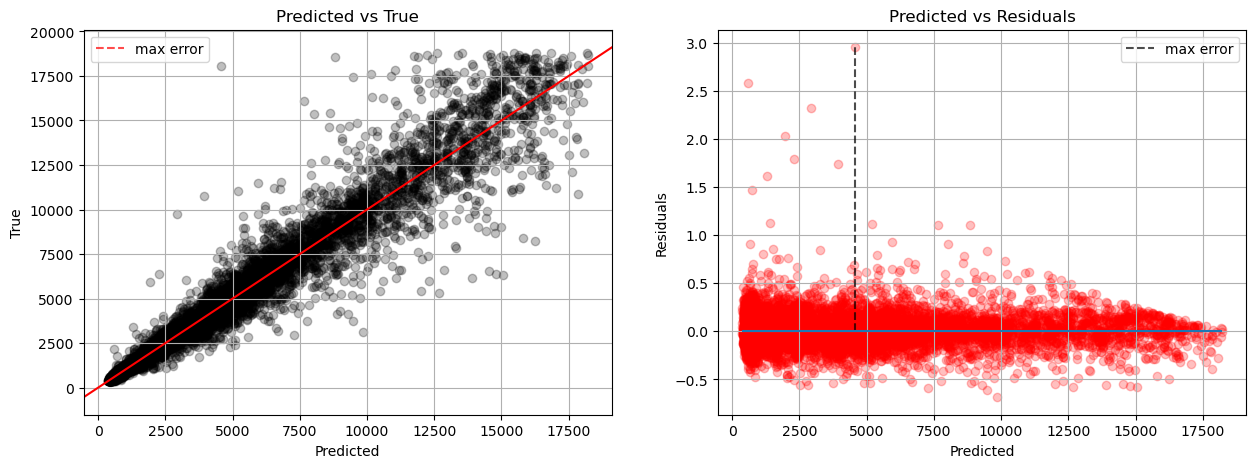

In [33]:
plot_2_error(y_test, best_knn.predict(X_test))

**SVR**

In [35]:
axis_transformer = Pipeline(steps=[
    ('missing_num', IterativeImputer(missing_values=0, max_iter=5)),
    ('scaler', StandardScaler())])

num = Pipeline(steps=[
    ('missing_num', IterativeImputer(missing_values=0, max_iter=5)),
    ('scaler', StandardScaler())])

clarity_map = [{
    'col':'clarity',##### Обратить внимание
    'mapping':{'IF':7, 'VVS1':6, 'VVS2':5, 'VS1':4, 'VS2':3, 
               'SI1':2, 'SI2':1, 'I1':0}
    }]

clarity_transformer = Pipeline(steps=[
    ('missing_num', SimpleImputer(strategy = 'most_frequent')),
    ('ce',ce.OrdinalEncoder(mapping=clarity_map)),
    ('scaler', MinMaxScaler())
    ])    
    
CT_SVR = ColumnTransformer([
        ("axis_transformer", axis_transformer, axis_features),
        ("num", num, num_features),
        # убрать быстую разряженную 
        ("cat", OneHotEncoder(sparse_output=False, drop='first'), cat_features),
        ("ordinal_map", clarity_transformer, ['clarity'])##### Обратить внимание
      ], remainder='passthrough').set_output(transform='pandas')

In [36]:
model_pipe = Pipeline([
                ('model', TransformedTargetRegressor(
                        regressor = Pipeline(steps=[
                                ('preproc', CT_SVR),
                                ('estimator', SVR())
                            ]),
                        transformer=PowerTransformer(method="box-cox"),
                        check_inverse = False)
                )])
model_pipe.fit(X_train, y_train)

Pipeline(steps=[('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=Pipeline(steps=[('preproc',
                                                                       ColumnTransformer(remainder='passthrough',
                                                                                         transformers=[('axis_transformer',
                                                                                                        Pipeline(steps=[('missing_num',
                                                                                                                         IterativeImputer(max_iter=5,
                                                                                                                                          missing_values=0)),
                                                                                                                        ('scaler',
                                                                                                                         StandardScaler())]),
                                                                                                        ['x',
                                                                                                         'y',
                                                                                                         'z']),
                                                                                                       ('num',
                                                                                                        Pipeline(steps=[('missing_num',
                                                                                                                         Iter...
                                                                                                                      sparse_output=False),
                                                                                                        ['cut',
                                                                                                         'color']),
                                                                                                       ('ordinal_map',
                                                                                                        Pipeline(steps=[('missing_num',
                                                                                                                         SimpleImputer(strategy='most_frequent')),
                                                                                                                        ('ce',
                                                                                                                         OrdinalEncoder(mapping=[{'col': 'clarity',
                                                                                                                                                  'data_type': dtype('O'),
                                                                                                                                                  'mapping': IF      7
VVS1    6
VVS2    5
VS1     4
VS2     3
SI1     2
SI2     1
I1      0
dtype: int64}])),
                                                                                                                        ('scaler',
                                                                                                                         MinMaxScaler())]),
                                                                                                        ['clarity'])])),
                                                                      ('estimator',
                                                                       SVR())]),
                                            transformer=PowerTransformer(method='box-cox')))])

In [37]:
param_grid = [
    {'model__regressor__estimator':[SVR(kernel = 'rbf')],
     'model__regressor__estimator__gamma': [0.07, 0.1],
     'model__regressor__estimator__C': [35, 40, 30],
     'model__regressor__estimator__epsilon': [0.07, 0.1]}
]
cv = KFold(n_splits=4, shuffle=True)
scoring= make_scorer(mse_irq)


grid_2 = RandomizedSearchCV(model_pipe, param_grid, cv=cv, n_jobs=-1, scoring=scoring, refit='MSE_IRQ')
grid_2.fit(X_train, y_train)

final = grid_2.best_estimator_
final.fit(X_train, y_train)

Pipeline(steps=[('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=Pipeline(steps=[('preproc',
                                                                       ColumnTransformer(remainder='passthrough',
                                                                                         transformers=[('axis_transformer',
                                                                                                        Pipeline(steps=[('missing_num',
                                                                                                                         IterativeImputer(max_iter=5,
                                                                                                                                          missing_values=0)),
                                                                                                                        ('scaler',
                                                                                                                         StandardScaler())]),
                                                                                                        ['x',
                                                                                                         'y',
                                                                                                         'z']),
                                                                                                       ('num',
                                                                                                        Pipeline(steps=[('missing_num',
                                                                                                                         Iter...
                                                                                                       ('ordinal_map',
                                                                                                        Pipeline(steps=[('missing_num',
                                                                                                                         SimpleImputer(strategy='most_frequent')),
                                                                                                                        ('ce',
                                                                                                                         OrdinalEncoder(mapping=[{'col': 'clarity',
                                                                                                                                                  'data_type': dtype('O'),
                                                                                                                                                  'mapping': IF      7
VVS1    6
VVS2    5
VS1     4
VS2     3
SI1     2
SI2     1
I1      0
dtype: int64}])),
                                                                                                                        ('scaler',
                                                                                                                         MinMaxScaler())]),
                                                                                                        ['clarity'])])),
                                                                      ('estimator',
                                                                       SVR(C=35,
                                                                           epsilon=0.07,
                                                                           gamma=0.07))]),
                                            transformer=PowerTransformer(method='box-cox')))])

In [38]:
y_pred_fin = final.predict(X_test)
print(mean_squared_error(y_test, y_pred_fin))
print(mse_irq(y_test, y_pred_fin))

397799.7013827635
-2169966.5332793654


In [42]:
grid_result = pd.DataFrame(grid_2.cv_results_).sort_values(["rank_test_score"])
grid_result.T

,9,0,8,1,4,6,7,2,3,5
mean_fit_time,33.462485,45.427154,37.641527,26.234695,22.537091,28.873306,47.076339,31.753646,51.261815,35.927507
std_fit_time,4.018434,0.605612,1.155191,0.297611,0.189297,0.972175,1.32273,0.69645,1.294847,0.885392
mean_score_time,2.027309,2.768956,2.597851,1.849738,1.871762,1.915085,2.613213,1.937221,2.808987,1.852279
std_score_time,0.02936,0.008527,0.377833,0.095299,0.047367,0.099209,0.210567,0.059505,0.128596,0.128459
param_model__regressor__estimator__gamma,0.07,0.07,0.07,0.07,0.07,0.1,0.1,0.1,0.1,0.1
param_model__regressor__estimator__epsilon,0.07,0.07,0.07,0.1,0.1,0.1,0.07,0.1,0.07,0.1
param_model__regressor__estimator__C,35,40,30,35,30,30,30,35,35,40
param_model__regressor__estimator,SVR(),SVR(),SVR(),SVR(),SVR(),SVR(),SVR(),SVR(),SVR(),SVR()
params,"{'model__regressor__estimator__gamma': 0.07, '...","{'model__regressor__estimator__gamma': 0.07, '...","{'model__regressor__estimator__gamma': 0.07, '...","{'model__regressor__estimator__gamma': 0.07, '...","{'model__regressor__estimator__gamma': 0.07, '...","{'model__regressor__estimator__gamma': 0.1, 'm...","{'model__regressor__estimator__gamma': 0.1, 'm...","{'model__regressor__estimator__gamma': 0.1, 'm...","{'model__regressor__estimator__gamma': 0.1, 'm...","{'model__regressor__estimator__gamma': 0.1, 'm..."
split0_test_score,-2024026.727779,-2034487.852888,-2015714.020798,-2165032.470376,-2193288.271638,-2311353.34941,-2212018.924126,-2319114.747102,-2241937.147804,-2358000.885357


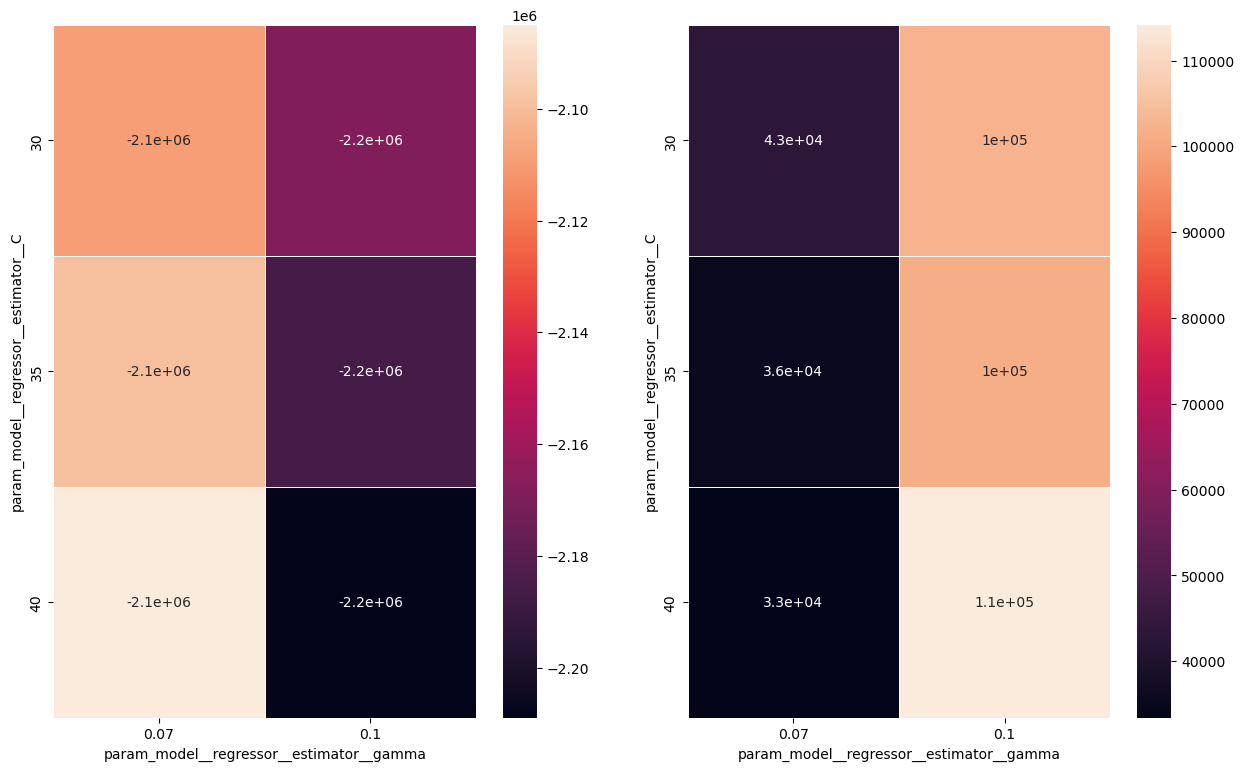

In [46]:
pv_table=grid_result.pivot_table(index='param_model__regressor__estimator__C',columns='param_model__regressor__estimator__gamma',values='mean_test_score')
pv_table_std=grid_result.pivot_table(index='param_model__regressor__estimator__C',columns='param_model__regressor__estimator__gamma',values='std_test_score')
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 9))
sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax1)
sns.heatmap(pv_table_std, annot=True, linewidths=.5, ax=ax2);

In [48]:
grid_2.best_params_

{'model__regressor__estimator__gamma': 0.07,
 'model__regressor__estimator__epsilon': 0.07,
 'model__regressor__estimator__C': 35,
 'model__regressor__estimator': SVR()}

In [50]:
print(mse_irq(y_test, final.predict(X_test)))
print(mean_squared_error(y_test, final.predict(X_test)))

-2169966.5332793654
397799.7013827635


In [52]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE

In [54]:
print(MAPE(y_test, final.predict(X_test)))

0.07880115188276077


In [ ]:
# import pickle

# # Запись модели
# with open('svc-model.pkl', 'wb') as f:
#     pickle.dump(final, f)